# Test

In [87]:
import pandas as pd

flag_list = [ '-f', '-i', '-n', '-d', '-f -i -n -d' ]
title_list = [ 'fold_substitution', 'includes_cache', 'length_cache', 'dynamic_maxlen', 'optimized']

data = pd.read_csv('./results.csv', index_col=0)
data = data.fillna('unoptimized')
data = data.replace(flag_list, title_list)
data = data.groupby(['program', 'flags']).mean()
data = pd.pivot_table(
    data,
    values='runtime',
    index='program',
    columns='flags',
)
data

flags,dynamic_maxlen,fold_substitution,includes_cache,length_cache,optimized,unoptimized
program,,,,,,
determined_forwarding_safe,81.1998,110.3610,110.4896,107.1134,84.6550,106.8238
determined_forwarding_unsafe,72.1300,592.5532,585.9972,586.4536,72.3686,626.1594
header_dependency_safe,105.2142,1806.1212,1709.6402,588.0872,53.8784,1804.1762
header_dependency_unsafe,100.5306,2474.2772,2733.3984,1347.9676,40.6434,2660.8934
ipv4_opt_safe,227.7054,4719.8672,5236.7462,2754.6314,127.1130,5301.3200
ipv4_opt_unsafe,213.3764,3543.6346,4218.3248,2058.3142,92.5850,4110.7176
ipv4_ttl_safe,100.3270,660.0470,646.2608,662.2836,92.5074,713.4368
ipv4_ttl_unsafe,66.4944,729.7084,863.9566,847.8216,63.9532,912.6048


Text(0, 0.5, 'Check-Time [ms]')

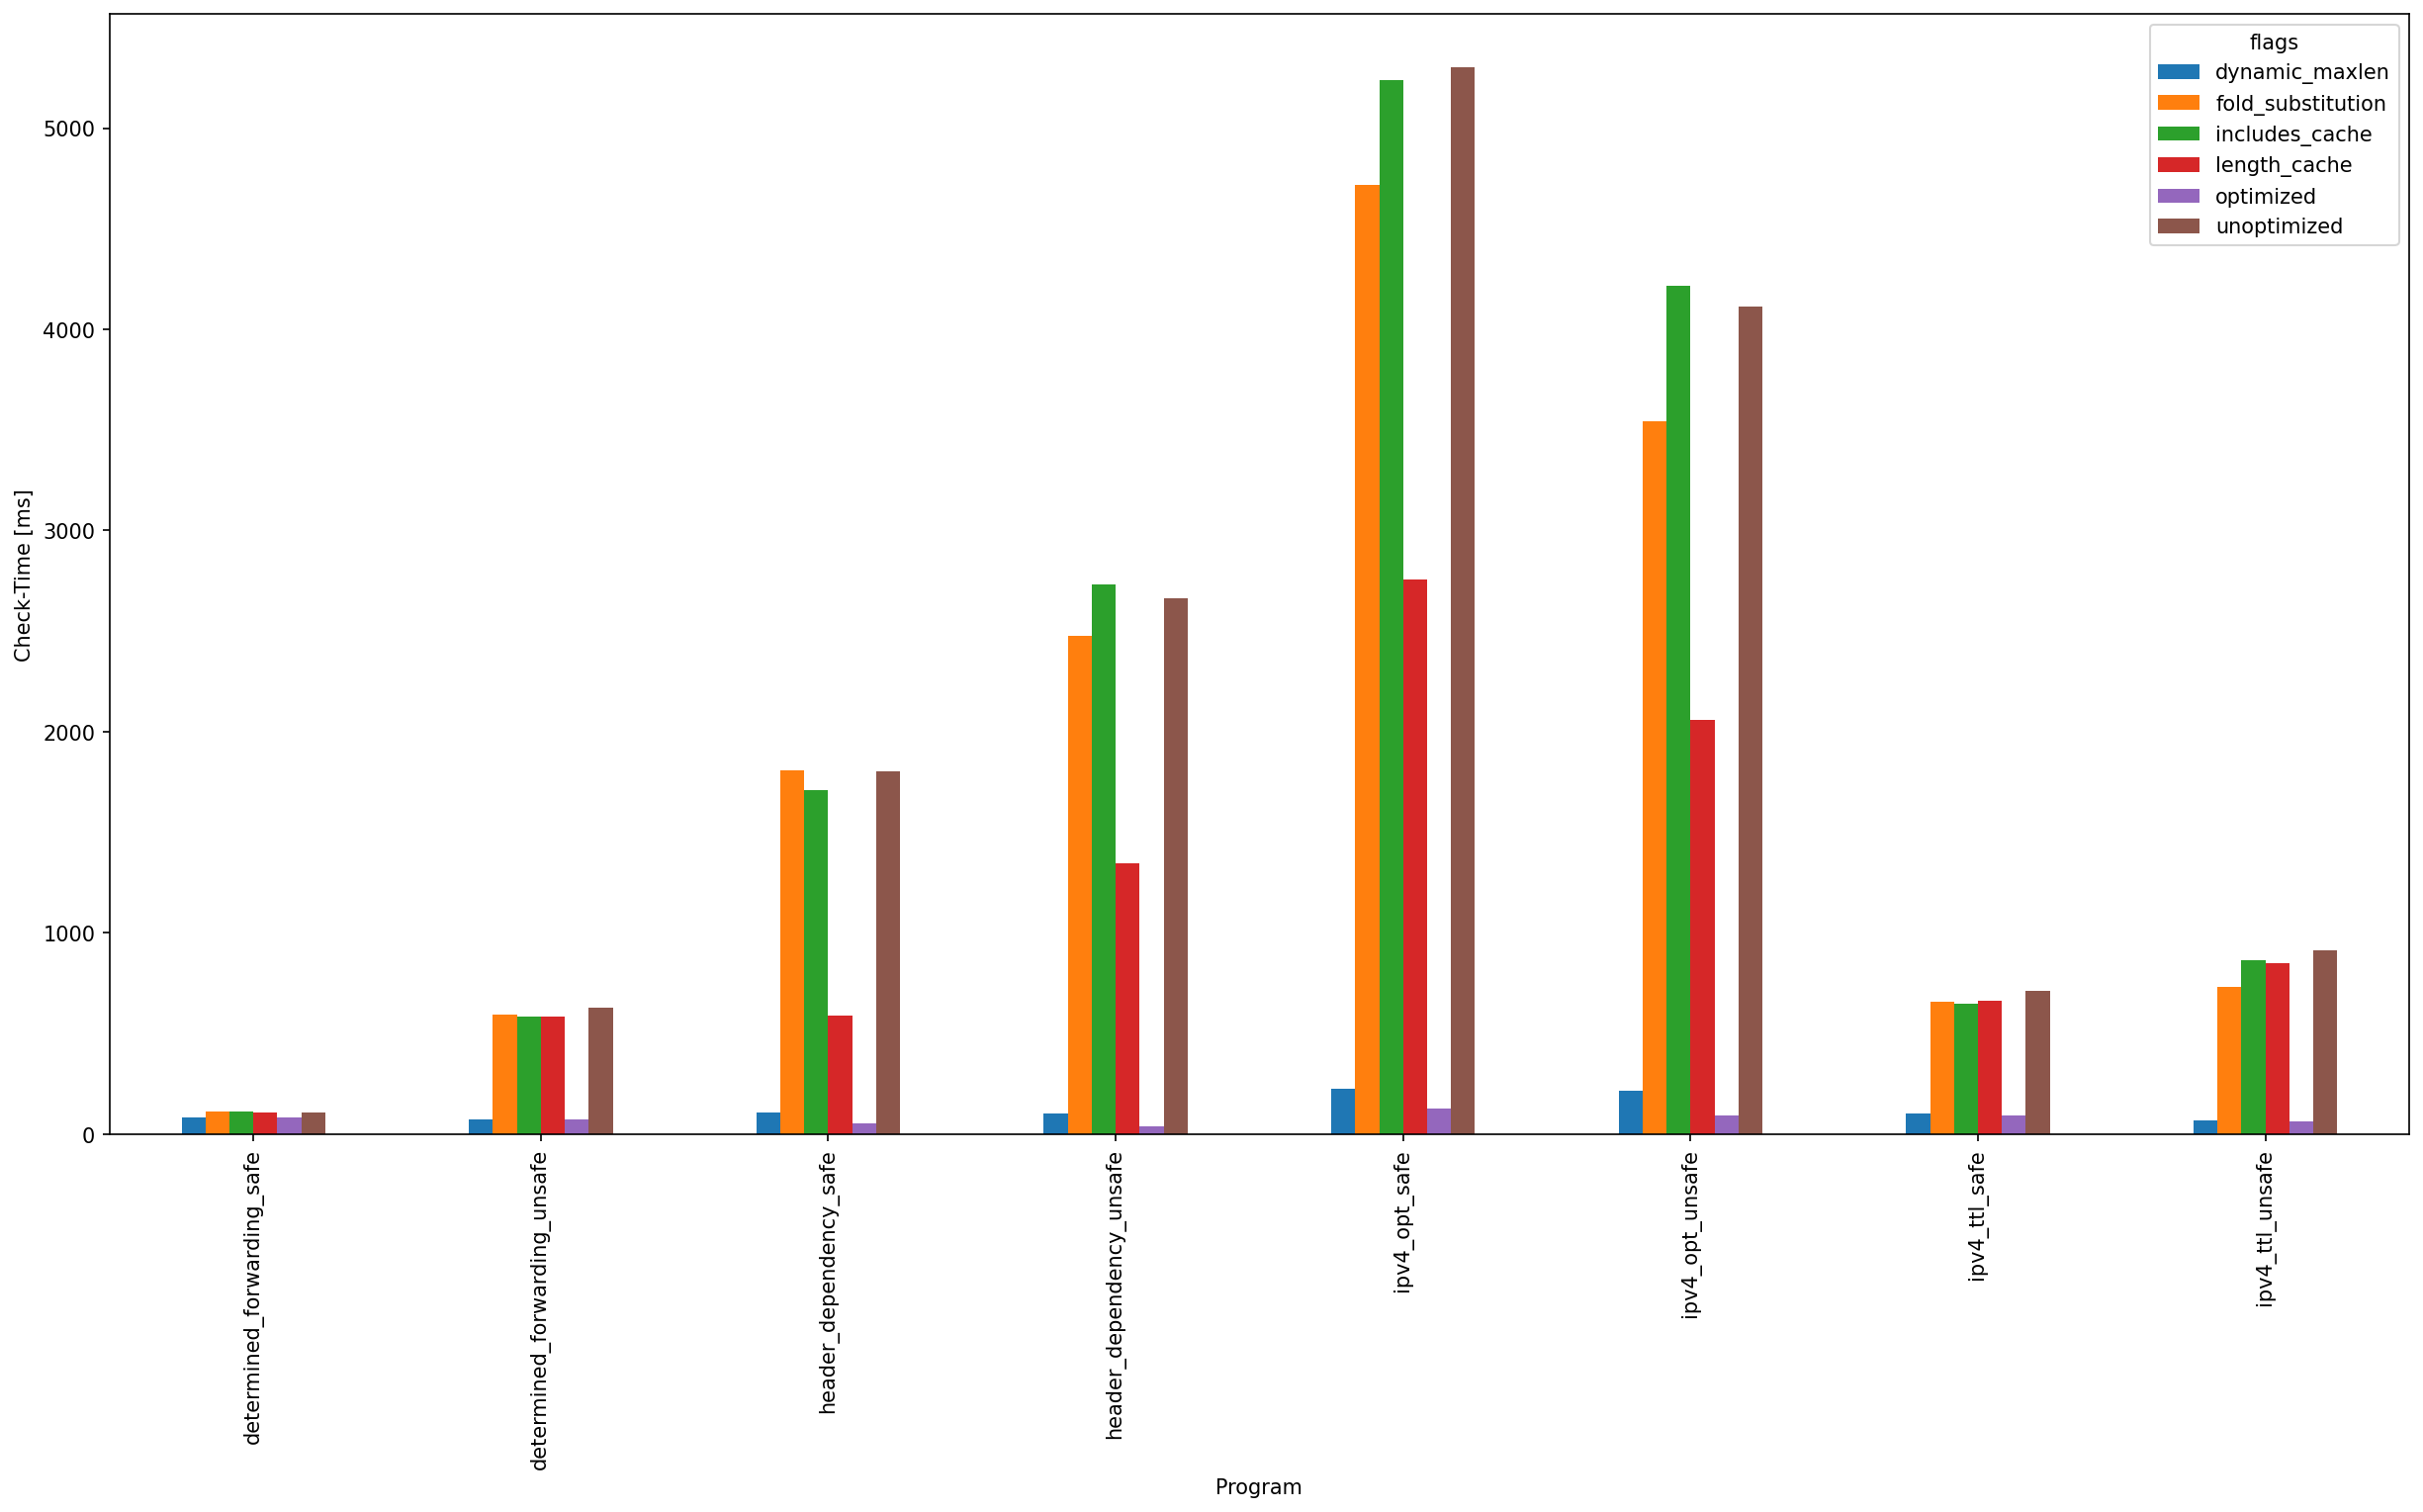

In [88]:

plot = data.plot(kind='bar')
fig = plot.get_figure()
fig.set_size_inches(20, 10)
fig.set_dpi(150)
plot.set_xlabel("Program")
plot.set_ylabel("Check-Time [ms]")